In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


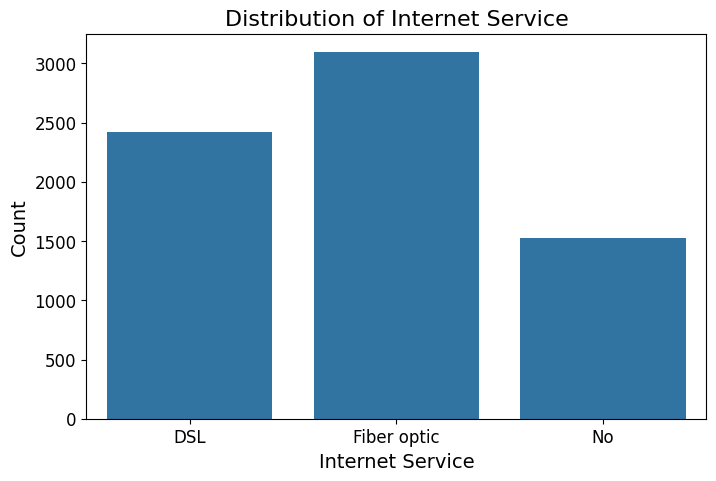

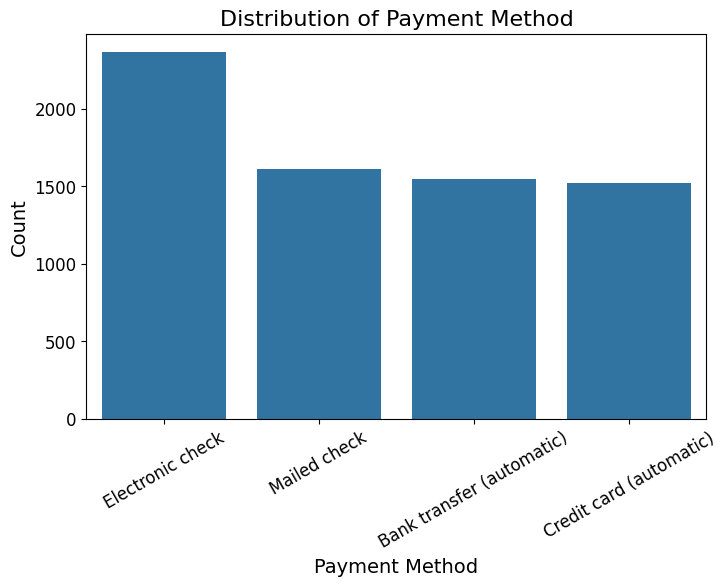

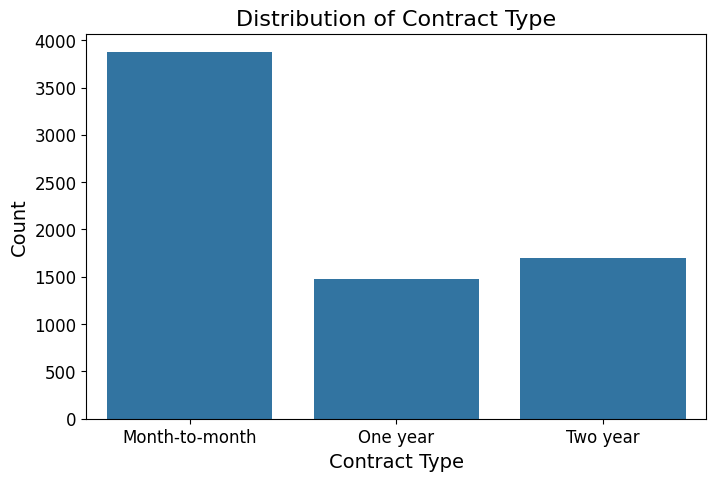

In [ ]:
# Visualization of some important variables

# Count plot for Internet Service
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='InternetService')
plt.title('Distribution of Internet Service', fontsize=16)
plt.xlabel('Internet Service', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Count plot for Payment Method
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='PaymentMethod')
plt.title('Distribution of Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.show()

# Count plot for Contract
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Contract')
plt.title('Distribution of Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Handle missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(0, inplace=True)

# Encode binary categorical variables (Yes/No -> 1/0)
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# One-hot encode remaining categorical variables
data = pd.get_dummies(data, columns=[
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)

# Drop irrelevant columns
data.drop(columns=['customerID'], inplace=True)

<ipython-input-10-053a3eaa1ca4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(0, inplace=True)


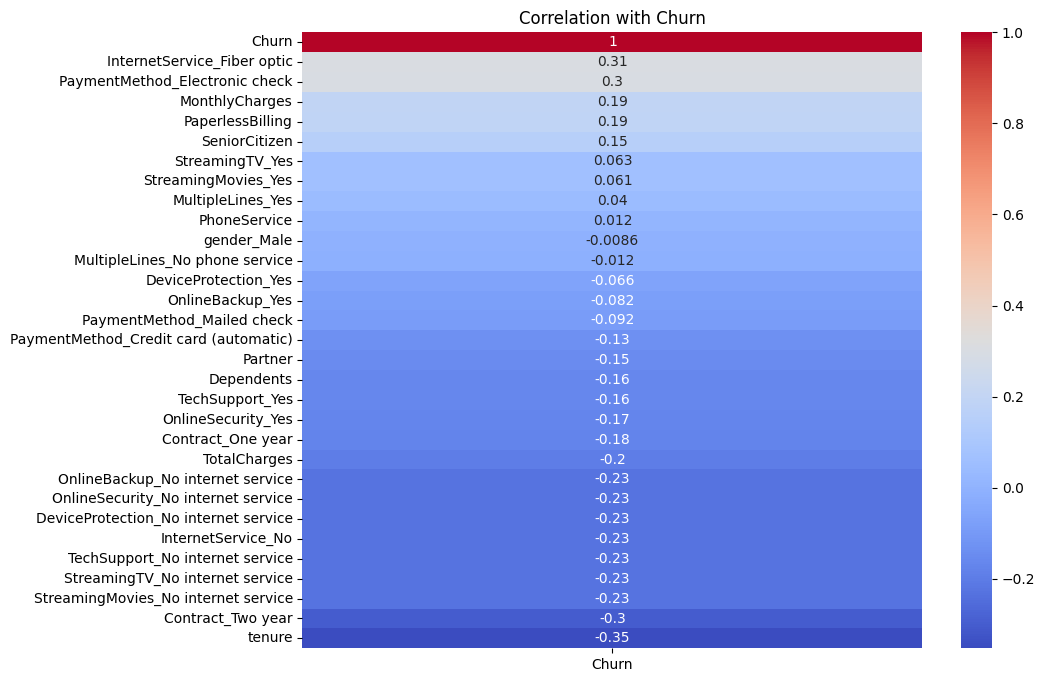

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Churn')
plt.show()


In [ ]:
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

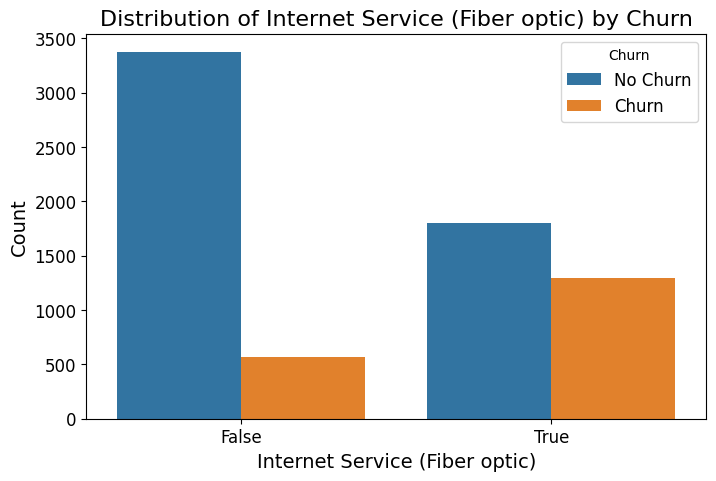

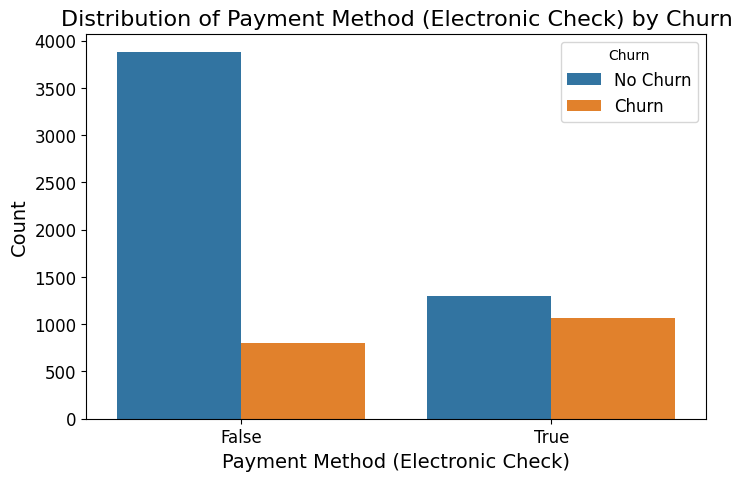

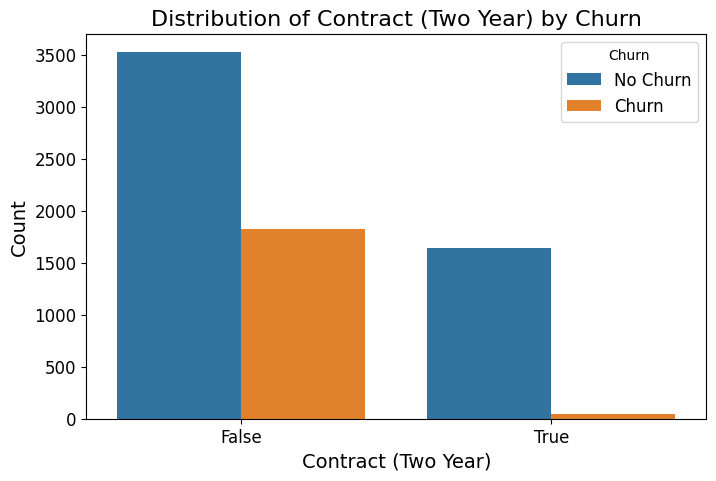

In [ ]:
# Visualization of some feature variables with target variable

import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Internet Service grouped by Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='InternetService_Fiber optic', hue='Churn')
plt.title('Distribution of Internet Service (Fiber optic) by Churn', fontsize=16)
plt.xlabel('Internet Service (Fiber optic)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Churn', labels=['No Churn', 'Churn'], fontsize=12)
plt.show()

# Count plot for Payment Method grouped by Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='PaymentMethod_Electronic check', hue='Churn')
plt.title('Distribution of Payment Method (Electronic Check) by Churn', fontsize=16)
plt.xlabel('Payment Method (Electronic Check)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Churn', labels=['No Churn', 'Churn'], fontsize=12)
plt.show()

# Count plot for Contract grouped by Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Contract_Two year', hue='Churn')
plt.title('Distribution of Contract (Two Year) by Churn', fontsize=16)
plt.xlabel('Contract (Two Year)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Churn', labels=['No Churn', 'Churn'], fontsize=12)
plt.show()


In the graphs, False and True on the x-axis represent the binary values of the encoded features:

InternetService_Fiber optic:

False: The customer does not have Fiber optic internet service.

True: The customer has Fiber optic internet service.

PaymentMethod_Electronic check:

False: The customer does not use Electronic check as their payment method.

True: The customer uses Electronic check as their payment method.

Contract_Two year:

False: The customer does not have a Two-year contract (e.g., they might have a Month-to-month or One-year contract).

True: The customer has a Two-year contract.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Encode categorical variables
categorical_cols = ['InternetService_Fiber optic', 'PaymentMethod_Mailed check', 'Contract_Two year', 'Churn']
data_encoded = data.copy()

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Select features based on correlation analysis
selected_features = ['InternetService_Fiber optic', 'PaymentMethod_Mailed check', 'Contract_Two year', 'tenure']
target = 'Churn'

# Create a new dataset with the selected features
X = data_encoded[selected_features]
y = data_encoded[target]

# One-hot encode the selected categorical features
X = pd.get_dummies(X, columns=['InternetService_Fiber optic', 'PaymentMethod_Mailed check', 'Contract_Two year'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Select the best model
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


Logistic Regression:

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.81      0.80      1409

------------------------------------------------------------
Random Forest:

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:29:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

------------------------------------------------------------
Neural Network:

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1036
           1       0.71      0.41      0.52       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409

------------------------------------------------------------
Best Model: Logistic Regression with accuracy 0.8055


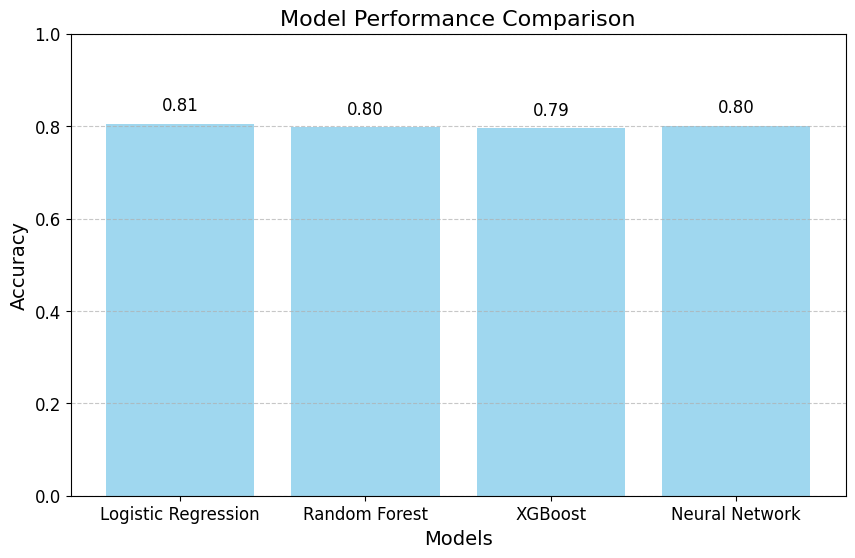

In [ ]:
import matplotlib.pyplot as plt

# Bar plot for model results
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, alpha=0.8, color='skyblue')

# Add values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=12)

# Formatting the plot
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_logistic_model = grid_search.best_estimator_
print(f"Best Regularization Strength (C): {grid_search.best_params_['C']}")


Best Regularization Strength (C): 0.01


In [ ]:
from sklearn.metrics import roc_curve
import numpy as np

# Predict probabilities for validation data
y_pred_probs = best_logistic_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Find the optimal threshold (Youden's J statistic)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")


Optimal Threshold: 0.26


In [ ]:
def predict_churn_with_user_input_optimized():
    print("Please enter the following details:")

    # User input for features
    internet_service = input("Internet Service (Options: 'Fiber optic', 'DSL', 'No'): ").strip()
    payment_method = input("Payment Method (Options: 'Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'): ").strip()
    contract = input("Contract (Options: 'Two year', 'One year', 'Month-to-month'): ").strip()
    tenure = int(input("Tenure (Enter a number, e.g., 12 for 12 months): ").strip())

    # Map inputs to encoded values
    input_data = {
        'tenure': tenure,
        'InternetService_Fiber optic': 1 if internet_service.lower() == 'fiber optic' else 0,
        'PaymentMethod_Electronic check': 1 if payment_method.lower() == 'electronic check' else 0,
        'Contract_Two year': 1 if contract.lower() == 'two year' else 0
    }

    # Fill in missing features with 0
    for feature in X.columns:
        if feature not in input_data:
            input_data[feature] = 0

    # Prepare input as a DataFrame and reorder columns
    input_df = pd.DataFrame([input_data])[X.columns]

    # Scale input
    input_scaled = scaler.transform(input_df)

    # Predict probabilities
    prob = best_logistic_model.predict_proba(input_scaled)[0, 1]

    # Apply the optimal threshold
    result = "Churn" if prob > optimal_threshold else "No Churn"
    # print(f"\nPrediction Probability: {prob:.2f}")
    print(f"The prediction based on the given inputs is: {result}")

# Call the function to take user input and predict
predict_churn_with_user_input_optimized()


Please enter the following details:
Internet Service (Options: 'Fiber optic', 'DSL', 'No'): dsl
Payment Method (Options: 'Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'): bank transfer
Contract (Options: 'Two year', 'One year', 'Month-to-month'): one year
Tenure (Enter a number, e.g., 12 for 12 months): 34
The prediction based on the given inputs is: No Churn


Analysis:


Customers with Fiber optic service and Electronic check payment method are more likely to churn.
A Month-to-month contract offers flexibility to leave anytime, and a short tenure (1 month) indicates a lack of loyalty or dissatisfaction with the service.

Customers with DSL service and Bank transfer payment method are less likely to churn, reflecting stability and trust in the service.
A One year contract indicates commitment, and a long tenure (36 months) reflects satisfaction and loyalty.

